In [1]:
import dask.bag as db
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [25]:
df2 = pd.read_csv('arxiv_2019_2022.csv', low_memory=False)
df2.head()

,id,authors,title,category,year
0,0704.0033,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Convergence of the discrete dipole approximati...,"['physics.optics', 'physics.comp-ph']",2022
1,0704.0038,"Maxim A. Yurkin, Alfons G. Hoekstra",The discrete dipole approximation: an overview...,"['physics.optics', 'physics.comp-ph']",2022
2,0704.0479,T.Geisser,The affine part of the Picard scheme,"['math.AG', 'math.KT']",2021
3,0704.1445,Yasha Gindikin and Vladimir A. Sablikov,Deformed Wigner crystal in a one-dimensional q...,"['cond-mat.str-el', 'cond-mat.mes-hall']",2019
4,0704.1476,Chris Austin,TeV-scale gravity in Horava-Witten theory on a...,['hep-th'],2022


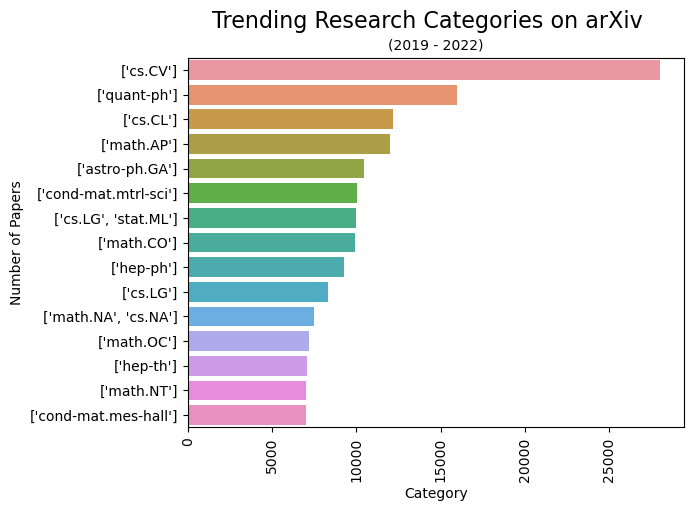

In [27]:
# Group the data by the 'category' column and count the number of papers for each category
category_counts = df2.groupby('category')['id'].count().sort_values(ascending=False)

# Take the top n categories with the most papers
top_n_categories = category_counts.head(15)

# Plot the results using a bar chart
sns.barplot(y=top_n_categories.index, x=top_n_categories.values, orient = 'h')
plt.xlabel('Category')
plt.ylabel('Number of Papers')
plt.title('(2019 - 2022)', fontsize=10)
plt.suptitle('Trending Research Categories on arXiv', fontsize=16)
plt.xticks(rotation=90)
plt.savefig('Trending Research Categories on arXiv (2019-2022).jpg',dpi=200,bbox_inches='tight')
plt.show()

In [4]:
total_categories = df2['category'].nunique()
print(f'Total Number of Categories are: {total_categories}')


Total Number of Categories are: 42937


In [5]:
category_counts = df2['category'].value_counts().sort_values(ascending=False)
category_counts = category_counts.to_frame().reset_index()
category_counts.columns = ['category', 'count']
print(category_counts)


                                                category  count
0                                              ['cs.CV']  28020
1                                           ['quant-ph']  15949
2                                              ['cs.CL']  12157
3                                            ['math.AP']  11975
4                                        ['astro-ph.GA']  10475
...                                                  ...    ...
42932  ['eess.SP', 'cond-mat.dis-nn', 'cs.ET', 'cs.SD...      1
42933     ['math.PR', 'math.DS', 'q-bio.MN', 'q-bio.PE']      1
42934      ['cs.DB', 'cs.AI', 'cs.CV', 'cs.IR', 'cs.LG']      1
42935  ['math.NA', 'cs.NA', 'math-ph', 'math.AP', 'ma...      1
42936    ['q-bio.PE', 'nlin.AO', 'q-bio.MN', 'q-bio.NC']      1

[42937 rows x 2 columns]


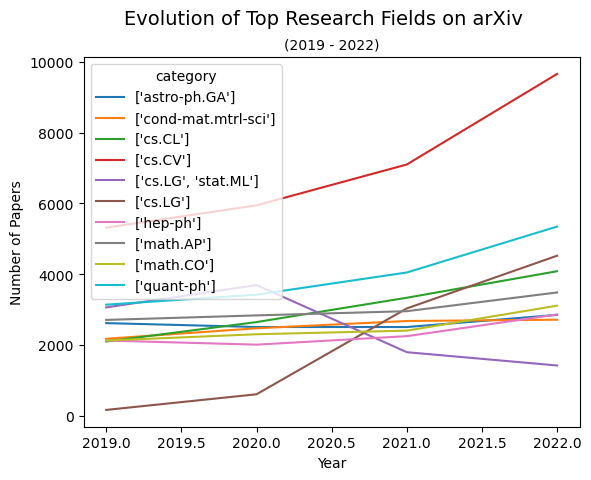

In [6]:
category_counts = df2['category'].value_counts().sort_values(ascending=False)
category_counts = category_counts.to_frame().reset_index()
category_counts.columns = ['category', 'count']

# filter the categories with count > 8000
category_counts = category_counts.query("count > 8000")

# merge the filtered categories with original dataframe
df2 = df2.merge(category_counts, on='category')

#group by year and category
df2 = df2.groupby(['year','category']).size().reset_index(name='count')

# plot the data
sns.lineplot(x='year',y='count',hue='category',data=df2)
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title("(2019 - 2022)", fontsize=10)
plt.suptitle("Evolution of Top Research Fields on arXiv", fontsize=14)
plt.savefig('Evolution of Top Research Fields on arXiv (2019-2022).jpg',dpi=200,bbox_inches='tight')
plt.show()

# Apply K-Mean Clusturing on 'category' column

In [3]:


# Load the arXiv dataset into a pandas DataFrame
df = pd.read_csv('arxiv_2019_2022.csv', low_memory=False )

# Convert the category column to a list of strings
df['category'] = df['category'].apply(lambda x: [x])


In [4]:
df.head()

,id,authors,title,category,year
0,0704.0033,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Convergence of the discrete dipole approximati...,"[['physics.optics', 'physics.comp-ph']]",2022
1,0704.0038,"Maxim A. Yurkin, Alfons G. Hoekstra",The discrete dipole approximation: an overview...,"[['physics.optics', 'physics.comp-ph']]",2022
2,0704.0479,T.Geisser,The affine part of the Picard scheme,"[['math.AG', 'math.KT']]",2021
3,0704.1445,Yasha Gindikin and Vladimir A. Sablikov,Deformed Wigner crystal in a one-dimensional q...,"[['cond-mat.str-el', 'cond-mat.mes-hall']]",2019
4,0704.1476,Chris Austin,TeV-scale gravity in Horava-Witten theory on a...,[['hep-th']],2022


In [ ]:
# Create one-hot encoded features for each category
categories = list(set([item for sublist in df['category'] for item in sublist]))
one_hot = pd.DataFrame()
for category in categories:
    one_hot[category] = df['category'].apply(lambda x: int(category in x))

# Concatenate the one-hot encoded features to the original DataFrame
df = pd.concat([df, one_hot], axis=1)

# Remove the original category column and the paper_id column
df = df.drop(['category'], axis=1)

# Run K-means clustering on the resulting DataFrame
kmeans = KMeans(n_clusters=7, random_state=0).fit(df)

# Print the cluster labels
print(kmeans.labels_)

In [9]:
#pip install wordcloud

In [11]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the arXiv dataset
df = pd.read_csv('arxiv_2019_2022.csv', low_memory=False)

# Join all the category names into a single string
text = ' '.join(df['category'].tolist())



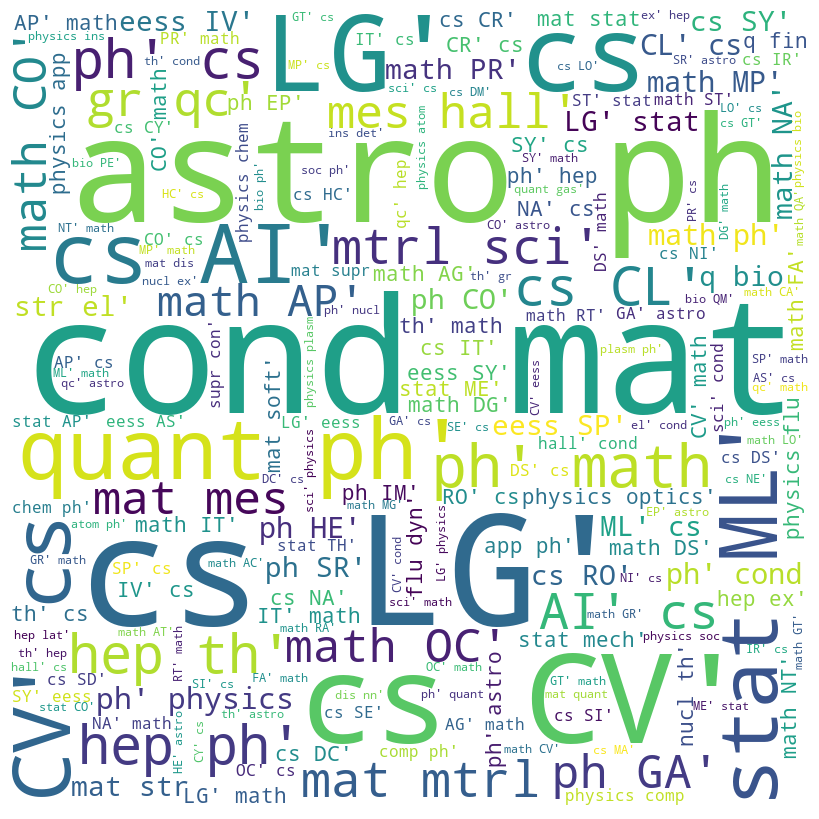

In [12]:
# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', 
                      min_font_size=10).generate(text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
# save Word Cloud
plt.savefig('category_wordcloud_2022.jpg', dpi=300)
# Show the plot
plt.show()

In [18]:
# Load the arXiv dataset
df = pd.read_csv('arxiv_2022.csv', low_memory=False)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation




In [20]:
# Create a CountVectorizer object to convert the text data into a bag-of-words format
vectorizer = CountVectorizer(stop_words='english')



In [21]:
# Convert the text data into a document-term matrix
doc_term_matrix = vectorizer.fit_transform(df['title'])

In [24]:
# Create an instance of LatentDirichletAllocation and fit the model to the document-term matrix
lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model.fit(doc_term_matrix)


LatentDirichletAllocation(n_components=5, random_state=0)

In [29]:
# Print the topics generated by the LDA model
for idx, topic in enumerate(lda_model.components_):
    print("Topic #%d:" % idx)
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()


Topic #0:
quantum model non equations field theory spin order phase dynamics

Topic #1:
models learning model using data based language study dark matter

Topic #2:
networks neural based quantum network using multi learning deep time

Topic #3:
learning based data multi optimization detection supervised groups reinforcement efficient

Topic #4:
black spaces type algebras star hole graphs surfaces mass functions



In [ ]:
# Preprocess category column
df['category'] = df['category'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
df['category'] = df['category'].apply(lambda x: x.lower())


# Preprocess the data
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(df['category'].astype(str), show_progress_bar=True)

# Apply Bertopic
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(embeddings)

# Print the top 10 topics
print(topic_model.get_topic_freq().head(10))

# Save visualization of top 10 topics
model.visualize_topics(top_n_topics=10, save=True, save_name='bertopic_title.png')